# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass


# Question 1

**Explain how you solve the model**

In [2]:
# a. Solving the model

OurModel = HouseholdSpecializationModelClass()

arsigma=np.array([0.5,1,1.5]) 

aralpha=np.array([0.25,0.5,0.75])

result2=[]
for k,v in itertools.product(arsigma,aralpha): #for all combinations in the two arrays
    OurModel.par.sigma=k #values from the first array is used as sigma parameters in the model
    OurModel.par.alpha=v #values from second array used as alpha parameters
    temp=OurModel.solve_discrete() #naming the solution function
    result2.append(temp.g) #appending the solutions of the variable "g"(HF/HM) to the empty list "result2"

print(result2)





[0.5454545454545454, 1.0, 1.8333333333333333, 0.3076923076923077, 1.0, 3.25, 0.21428571428571427, 1.0, 4.666666666666667]


In [3]:

# b. Illustrating results

# i. Changing the solution matrix from 9x1 list to 3x3 dataframe and adding alpha and sigma as rows and columns
ser=pd.Series(result2)
ser2=ser.values.reshape((3,3))
df=pd.DataFrame(ser2, index=[arsigma], columns=[aralpha])

# ii. Style
s=pd.concat( #creating a dataframe with concatenated row and column titles, and saving it as "s"
    [pd.concat(
    [df],
    keys=['alpha'], axis=1)],
    keys=['sigma'])

cm = sns.light_palette('blue', as_cmap=True) #creating and naming a color palette
s.style.\
    set_caption('Table 0 - values of HF/HM for certain parameter value combinations').\
    background_gradient(cmap=cm, axis=None).\
    format_index(axis=0,precision=2).\
    format_index(axis=1, precision=2).\
    format(precision=4) #styling the "s" dataframe with caption, background color gradient, and formatting decimals









# Question 2

Explain your code and procedure

In [4]:

# a. Solving the model

arwF=np.array([0.8,0.9,1.0,1.1,1.2]) #array of values that wF can take for the question


result3=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel.par.wF=k
    temp=OurModel.solve_discrete()
    result3.append(temp.g)

result3a=np.log(result3)

print(result3a)

result4=[] 
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel.par.wF=k
    temp=OurModel.solve_discrete()
    result4.append(temp.h)

result4a=np.log(result4)

print(result4a)





[2.07944154 1.60943791 1.54044504 1.54044504 1.46633707]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


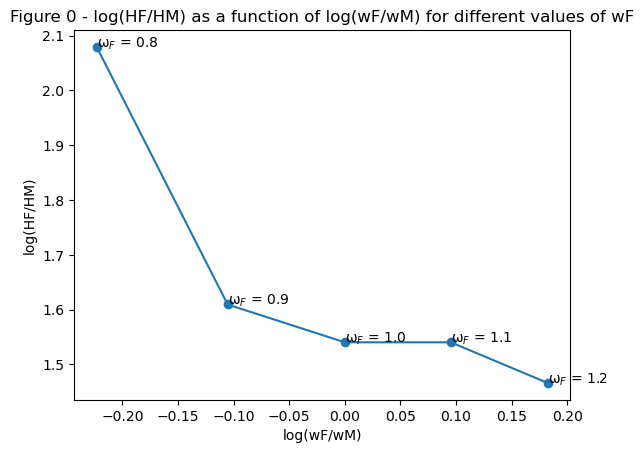

In [21]:
# b. Illustrating the results

plt.plot(result4a, result3a, marker='o')
plt.title('Figure 0 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result4a[i],result3a[i]))

plt.show()

# Question 3

Explain your code and procedure

In [15]:
# a. solving the model

result5=[]
test=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel.par.wF=k
    temp=OurModel.solve()
    result5.append(temp.g)
    test.append(temp.HF_vec+temp.LF_vec)
    test.append(temp.HM_vec+temp.LM_vec)

result5a=np.log(result5)
print(result5a)

print(test)


result6=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel.par.wF=k
    temp=OurModel.solve()
    result6.append(temp.h)

result6a=np.log(result6)
print(result6a)

[1.87879697 1.80835663 1.65002429 1.50680921 1.37620006]
[7.983076565297302, 9.28885330894741, 8.196472406586077, 9.101889404303087, 8.644708176809475, 8.645130021348391, 9.016033787296875, 8.194289834967156, 9.320237170897787, 7.761769964511643]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


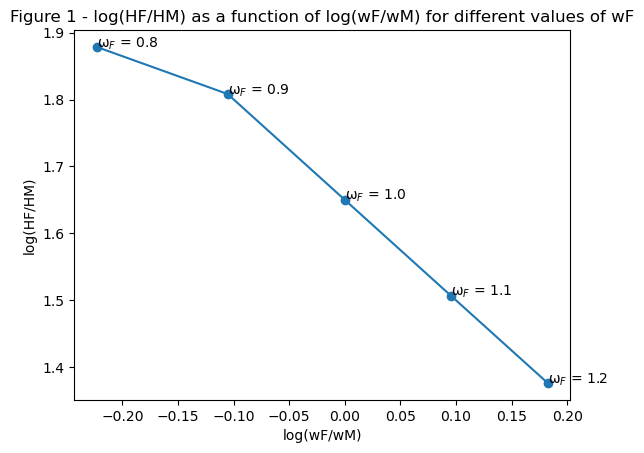

In [20]:
# b. illustrating results

plt.plot(result6a, result5a, marker='o')
plt.title('Figure 1 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result6a[i],result5a[i]))

plt.show()

# Question 4

ADD CONCISE CONLUSION.